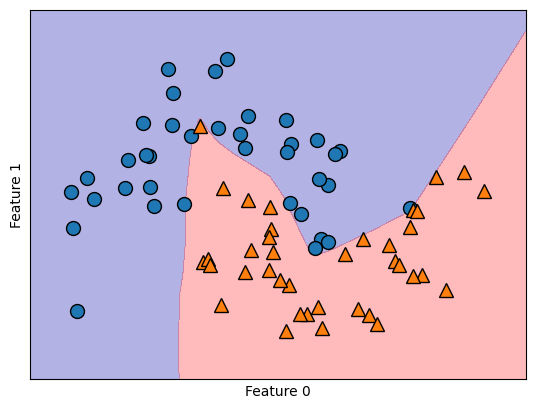

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import sklearn
import graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate a synthetic two-class dataset shaped like interleaving half-moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Split the dataset into training and test sets
# stratify=y ensures class proportions are preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Create a Multi-Layer Perceptron (MLP) classifier
# solver='lbfgs' specifies the optimization algorithm
# random_state=0 ensures reproducibility
# .fit(...) trains the model on the training data
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

# Plot the decision boundary learned by the MLP
# fill=True colors the regions, alpha=.3 makes them semi-transparent
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)

# Scatter plot of the training data points
# Different colors represent different classes
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

# Label the axis 
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.savefig("neural_moons100.svg")

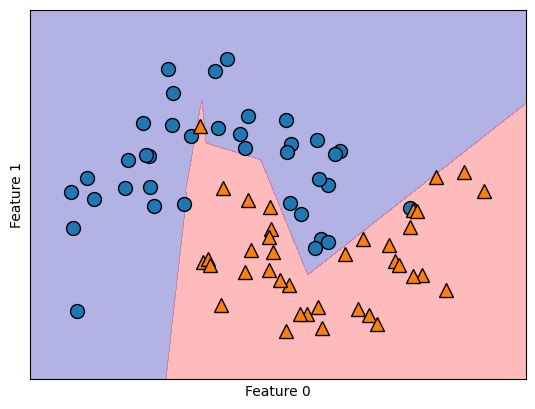

In [26]:
# Create a Multi-Layer Perceptron (MLP) classifier with 10 hidden layers
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.savefig("neural_moons10.svg")

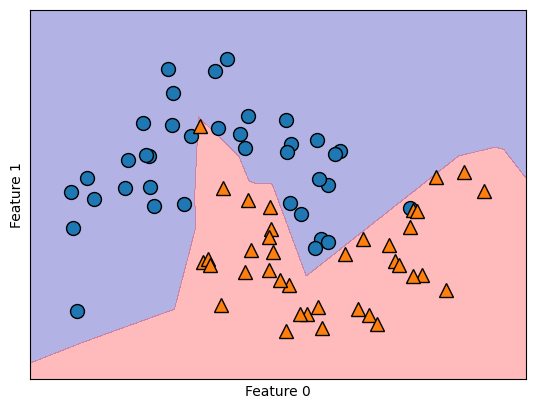

In [28]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(algorithm='l-bfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

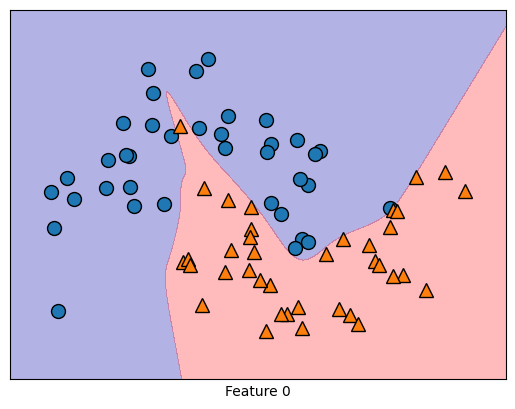

In [32]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh', max_iter=1000,
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.savefig("neural_moons10_tan.svg")

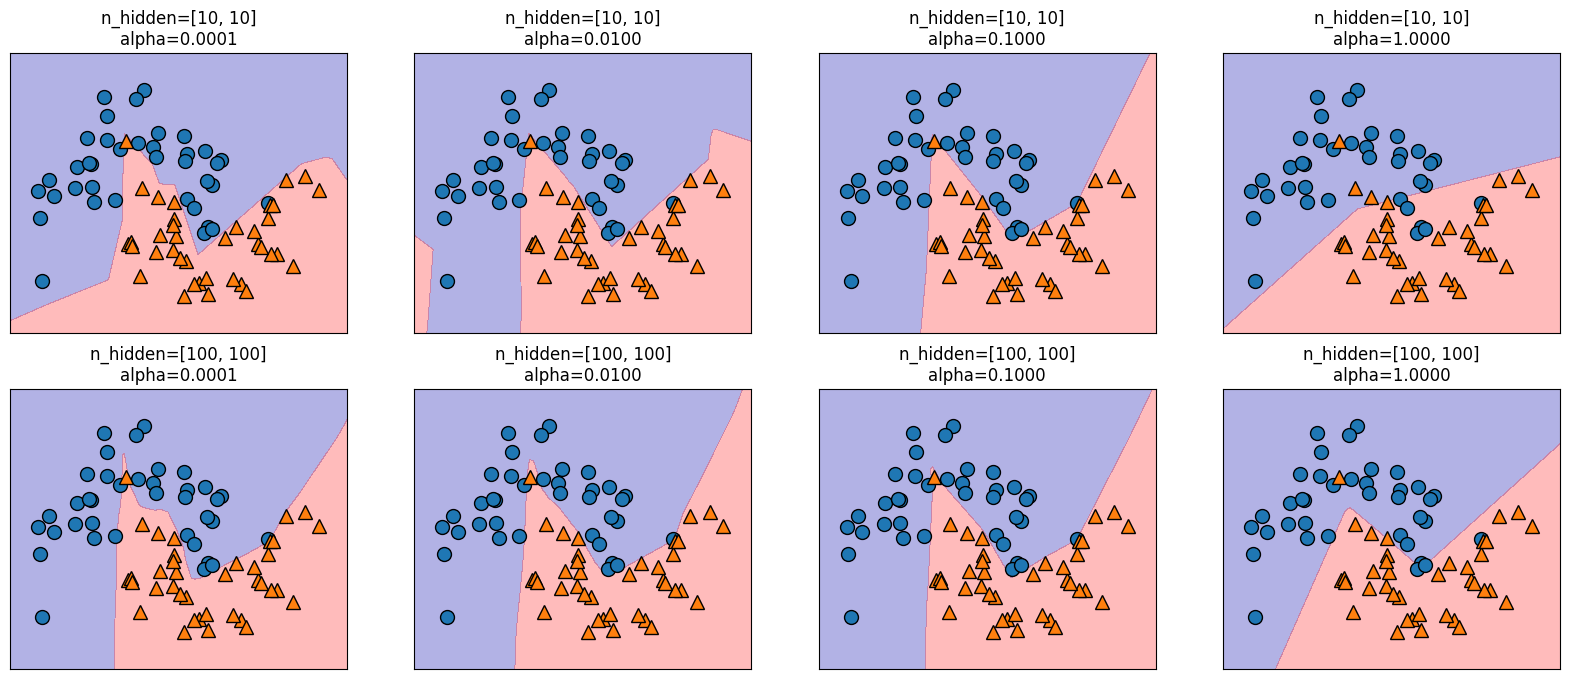

In [36]:
# Create a Multi-Layer Perceptron (MLP) classifier with l2 penalty
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha))
plt.savefig("neural_moons_l2.svg")

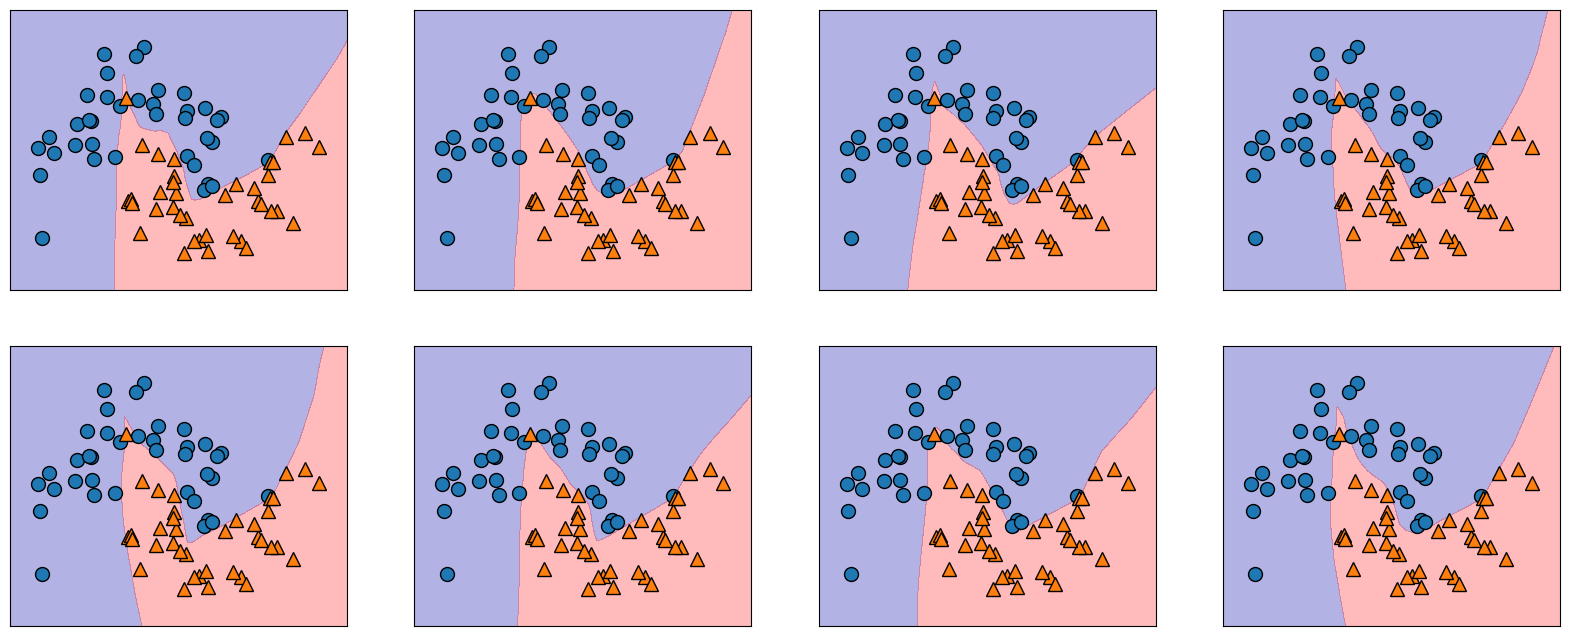

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
    hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
plt.savefig("neural_moons_random_weights.svg")

In [6]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
# Create and train the MLP classifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [8]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [20]:
# Create a Multi-Layer Perceptron (MLP) classifier with l2 penalty
mlp = MLPClassifier(max_iter=1000, alpha=0.7, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.979


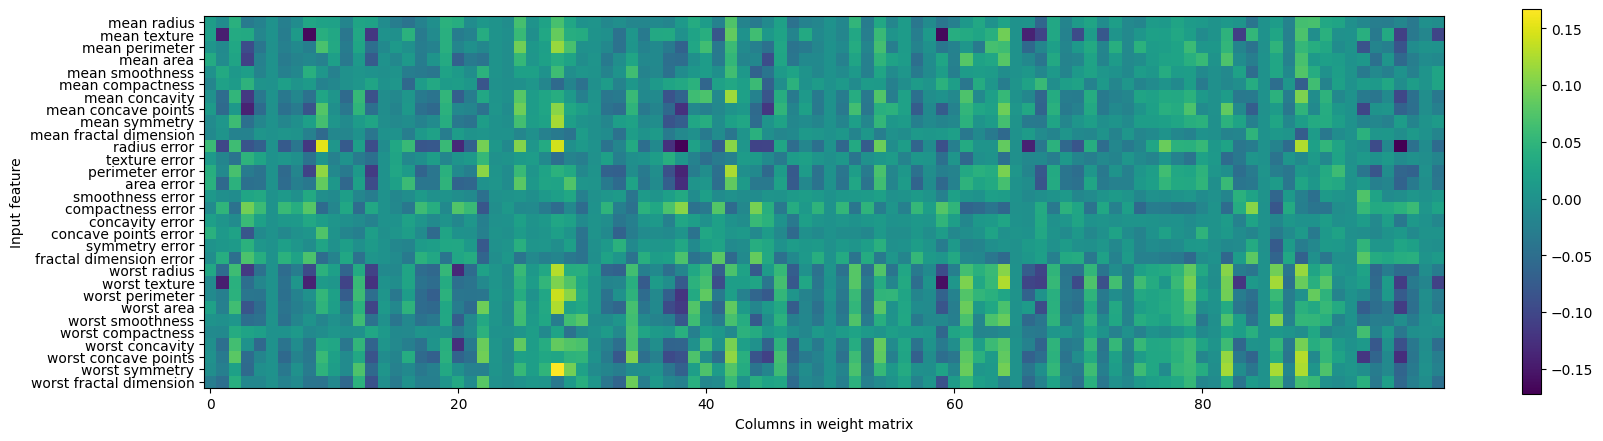

In [23]:
# Create heat map of the first layer weights in a neural network
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.savefig("cancer_heat_map.svg")